## Data Overview
Let's briefly describe the data before starting our visualizations.

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [24]:
github_repo = pd.read_csv('repo_info_stop75.csv', index_col='Unnamed: 0')
github_repo = github_repo.dropna()
topic_rel = pd.read_csv('topic_relationship_table_stop75.csv', index_col='Unnamed: 0')
topic_rel = topic_rel.reset_index(drop=True)

The github_repo table contains repo data scraped from github for my final project dataset. Contains 7800 repositories that we the top search results of 38 searches for different common keywords. 
The topic relationship table maps repo ids (from github_repo) to topics. Multi-to-multi relationship table. 

In [9]:
topic_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67779 entries, 0 to 44999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      67779 non-null  int64 
 1   topic   67779 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
github_repo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22148 entries, 442942525 to 89774728
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               22148 non-null  object
 1   stargazers_count   22148 non-null  int64 
 2   forks_count        22148 non-null  int64 
 3   subscribers_count  22148 non-null  int64 
 4   topics             22148 non-null  object
 5   language           22148 non-null  object
 6   created_at         22148 non-null  object
 7   updated_at         22148 non-null  object
 8   url                22148 non-null  object
 9   search_word        22148 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.9+ MB


In [11]:
github_repo

,name,stargazers_count,forks_count,subscribers_count,topics,language,created_at,updated_at,url,search_word
442942525,3d,1276,745,25,"['3d', 'canvas', 'css', 'html', 'javascript', ...",JavaScript,2021-12-30T02:19:09Z,2022-04-14T02:03:05Z,/dragonir/3d,3D
576201,three.js,80956,31338,2545,"['3d', 'augmented-reality', 'canvas', 'html5',...",JavaScript,2010-03-23T18:58:01Z,2022-04-14T09:56:48Z,/mrdoob/three.js,3D
254127753,3d-photo-inpainting,5869,908,145,"['3d-photo', 'novel-view-synthesis']",Python,2020-04-08T15:31:45Z,2022-04-14T09:53:49Z,/vt-vl-lab/3d-photo-inpainting,3D
139158036,3DDFA,3227,622,120,"['3d', '3d-face', '3dmm', 'computer-vision', '...",Python,2018-06-29T14:19:21Z,2022-04-13T07:44:01Z,/cleardusk/3DDFA,3D
34405381,meshroom,7789,803,277,"['3d-reconstruction', 'alicevision', 'camera-t...",Python,2015-04-22T17:33:16Z,2022-04-14T07:38:28Z,/alicevision/meshroom,3D
...,...,...,...,...,...,...,...,...,...,...
145420615,node-window-manager,312,40,6,"['cpp', 'library', 'linux', 'macos', 'native',...",C++,2018-08-20T13:21:58Z,2022-04-07T16:30:58Z,/sentialx/node-window-manager,windows
133277182,Wu10Man,558,70,20,"['disabling-services', 'pausing-updates', 'reg...",C#,2018-05-13T21:53:03Z,2022-04-14T19:32:06Z,/WereDev/Wu10Man,windows
7301482,python-evtx,543,149,40,"['event-log', 'evtx', 'forensics']",Python,2012-12-24T03:06:25Z,2022-04-13T12:05:49Z,/williballenthin/python-evtx,windows
395658506,chainsaw,1150,103,31,[],Rust,2021-08-13T13:07:24Z,2022-04-14T21:09:45Z,/countercept/chainsaw,windows


### Plot 1

In [12]:
language_frequency = github_repo.groupby('language').size().sort_values(ascending=False)

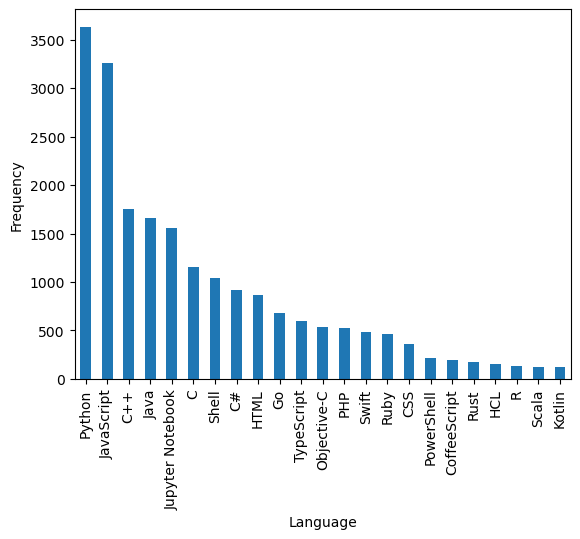

In [15]:
language_frequency[language_frequency>100].plot.bar()
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

In [28]:
# get language for each repo in topic relationship table
topic_rel['language'] = [github_repo.loc[topic_rel.loc[i,'id'],'language'] for i in list(topic_rel.index) if topic_rel.loc[i,'id'] in github_repo.index]

ValueError: Length of values (63128) does not match length of index (67779)

In [12]:
!pip install nltk
import nltk

# when scraping some topics copied over the entire list. Remove these topics
topic_rel = topic_rel[topic_rel.topic.str[0] != '[']

stemmer = nltk.stem.porter.PorterStemmer()
def stemming(topic):
    return '-'.join([stemmer.stem(w) for w in topic.split("-")])

topic_rel['topic_simple'] = topic_rel['topic'].apply(stemming)
topic_rel['topic_simple'] = topic_rel['topic_simple'].apply(lambda x : x.split('-')[0])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.2/763.2 KB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 8.2 MB/s eta 0:00:00


### Plot 2

In [13]:
topic_frequency = topic_rel.dropna().groupby('topic_simple').size().sort_values(ascending=False)

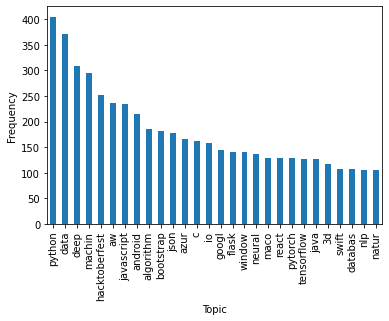

In [14]:
topic_frequency[topic_frequency>100].plot.bar()
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()

In [21]:
topic_counts = topic_rel.groupby('topic_simple').count().sort_values(by='id',ascending=False)
common_topics = list(topic_counts[topic_counts.id>=125].index)

In [22]:
language_by_topic = pd.DataFrame(topic_rel[topic_rel['topic_simple'].isin(common_topics)].groupby(['topic_simple', 'language']).size(),columns=['size'])
language_by_topic = language_by_topic['size'].unstack()
language_by_topic = language_by_topic.fillna(0)
language_by_topic.sum().sort_values(ascending=False)

language
Python              1091.0
JavaScript           577.0
Jupyter Notebook     576.0
Java                 453.0
C++                  327.0
                     ...  
F#                     1.0
Batchfile              1.0
Rascal                 1.0
Haml                   1.0
q                      1.0
Length: 70, dtype: float64

In [23]:
#languages with more than 100 counts are included
top_languages = ['Python','JavaScript','Jupyter Notebook','Java','C++','TypeScript','Swift','C','HTML','Go','C#']
other_languages = [l for l in list(language_by_topic.columns) if l not in top_languages]

In [24]:
language_by_topic['Other'] = language_by_topic[other_languages].sum(axis=1)
language_by_topic_dropped = language_by_topic.drop(columns=other_languages)
language_by_topic_percent = language_by_topic_dropped.apply(lambda x: x*100/sum(x), axis=1)

In [25]:
language_by_topic_percent

language,C,C#,C++,Go,HTML,Java,JavaScript,Jupyter Notebook,Python,Swift,TypeScript,Other
topic_simple,,,,,,,,,,,,
algorithm,3.783784,3.783784,19.459459,6.486486,0.000000,22.702703,8.108108,5.405405,17.837838,1.621622,1.621622,9.189189
android,2.803738,1.869159,5.140187,0.467290,0.934579,67.757009,5.607477,0.000000,3.271028,0.000000,1.869159,10.280374
aw,0.423729,1.271186,0.423729,10.169492,0.423729,16.101695,12.288136,0.847458,22.033898,0.423729,6.779661,28.813559
awesom,0.000000,0.000000,0.000000,6.122449,4.081633,4.081633,24.489796,8.163265,10.204082,10.204082,0.000000,32.653061
azur,3.030303,12.727273,0.000000,7.878788,1.818182,5.454545,5.454545,5.454545,15.757576,0.000000,5.454545,36.969697
bootstrap,0.000000,0.000000,0.000000,0.000000,21.546961,0.552486,24.861878,0.000000,1.657459,0.000000,3.314917,48.066298
c,36.419753,19.753086,33.333333,0.000000,0.000000,1.851852,1.234568,0.000000,1.234568,1.234568,0.000000,4.938272
data,2.156334,1.078167,7.008086,3.773585,2.695418,5.929919,10.781671,28.301887,16.442049,1.078167,8.355795,12.398922
deep,1.948052,0.649351,7.467532,0.649351,1.623377,2.597403,2.272727,29.220779,47.402597,1.298701,0.000000,4.870130


### Plot 3

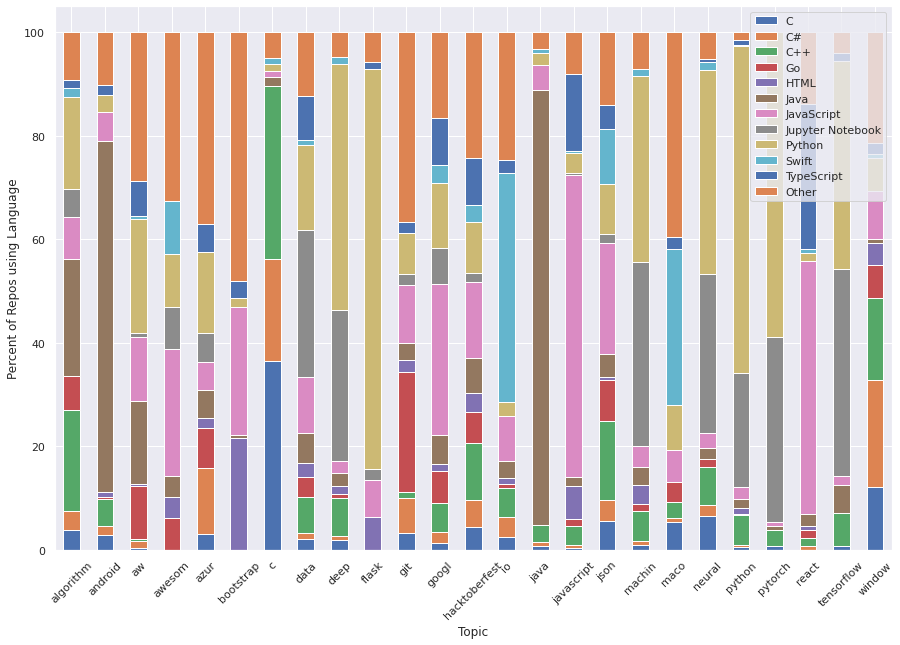

In [26]:
# Set the Seaborn default theme on Matmplotlib
sns.set()
language_by_topic_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(15,10)
plt.ylabel('Percent of Repos using Language')
plt.xlabel('Topic')
plt.legend()
xt = plt.xticks(rotation=45)
plt.show()

In [235]:
#get year created
github_repo['year_created'] = github_repo['created_at'].apply(lambda x: x[:4])
github_repo_dropped = github_repo.dropna()
github_repo_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7180 entries, 442942525 to 62802730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               7180 non-null   object
 1   stargazers_count   7180 non-null   int64 
 2   forks_count        7180 non-null   int64 
 3   subscribers_count  7180 non-null   int64 
 4   topics             7180 non-null   object
 5   language           7180 non-null   object
 6   created_at         7180 non-null   object
 7   updated_at         7180 non-null   object
 8   url                7180 non-null   object
 9   search_word        7180 non-null   object
 10  year_created       7180 non-null   object
dtypes: int64(3), object(8)
memory usage: 673.1+ KB


In [236]:
language_by_year = pd.DataFrame(github_repo_dropped[github_repo_dropped.year_created != '2022'].groupby(['year_created', 'language']).size(),columns=['size'])
language_by_year = language_by_year['size'].unstack()
language_by_year = language_by_year.fillna(0)

top_languages = ['Python','JavaScript','Jupyter Notebook','Java','C++','TypeScript','C','HTML','Go','C#','Shell']
other_languages = [l for l in list(language_by_year.columns) if l not in top_languages]
language_by_year['Other'] = language_by_year[other_languages].sum(axis=1)
language_by_year_dropped = language_by_year.drop(columns=other_languages)
language_by_year_percent = language_by_year_dropped.apply(lambda x: x*100/sum(x), axis=1)

### Plot 4

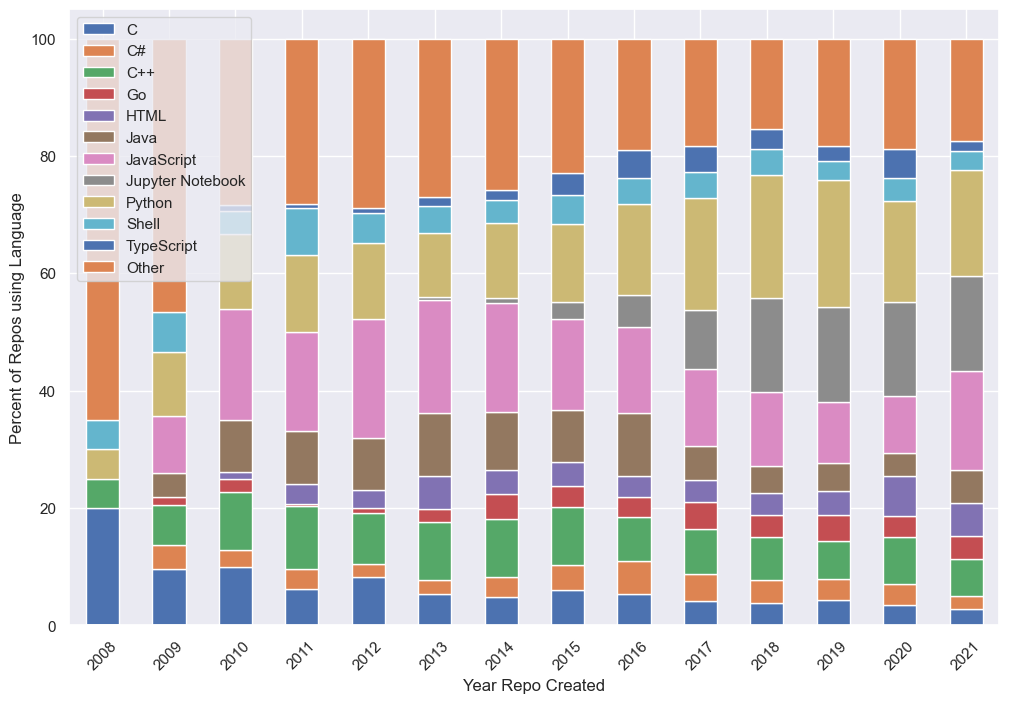

In [237]:
language_by_year_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos using Language')
plt.xlabel('Year Repo Created')
plt.legend()
plt.show()

In [238]:
topic_rel['year_created'] = [github_repo.loc[topic_rel.loc[i,'id'],'year_created'] for i in list(topic_rel.index)]

In [239]:
topic_by_year = pd.DataFrame(topic_rel[topic_rel.year_created != '2022'].groupby(['year_created', 'topic_simple']).size(),columns=['size'])
topic_by_year = topic_by_year['size'].unstack()
topic_by_year = topic_by_year.fillna(0)

In [240]:
topic_by_year.sum().sort_values(ascending=False).head(40)

topic_simple
python           422.0
data             419.0
deep             360.0
machin           356.0
hacktoberfest    258.0
javascript       256.0
aw               249.0
android          246.0
algorithm        208.0
bootstrap        183.0
json             180.0
azur             180.0
io               179.0
c                168.0
googl            154.0
window           151.0
neural           149.0
flask            147.0
awesom           143.0
react            138.0
java             135.0
tensorflow       133.0
maco             132.0
pytorch          132.0
git              125.0
nlp              124.0
3d               124.0
swift            122.0
natur            121.0
databas          110.0
api              109.0
css              102.0
bash             101.0
docker           101.0
chrome           100.0
graph             94.0
golang            93.0
visual            93.0
interview         87.0
arduino           87.0
dtype: float64

In [241]:
# included top topics that weren't languages
top_topics = ['data','deep','machin','hackoberfest','android','neural','googl','io','nlp','3d','natur','databas','algorithm']
other_topics = [l for l in list(topic_by_year.columns) if l not in top_topics]
topic_by_year['Other'] = topic_by_year[other_topics].sum(axis=1)
topic_by_year_dropped = topic_by_year.drop(columns=other_topics)
topic_by_year_percent = topic_by_year_dropped.apply(lambda x: x*100/sum(x), axis=1)

### Plot 5

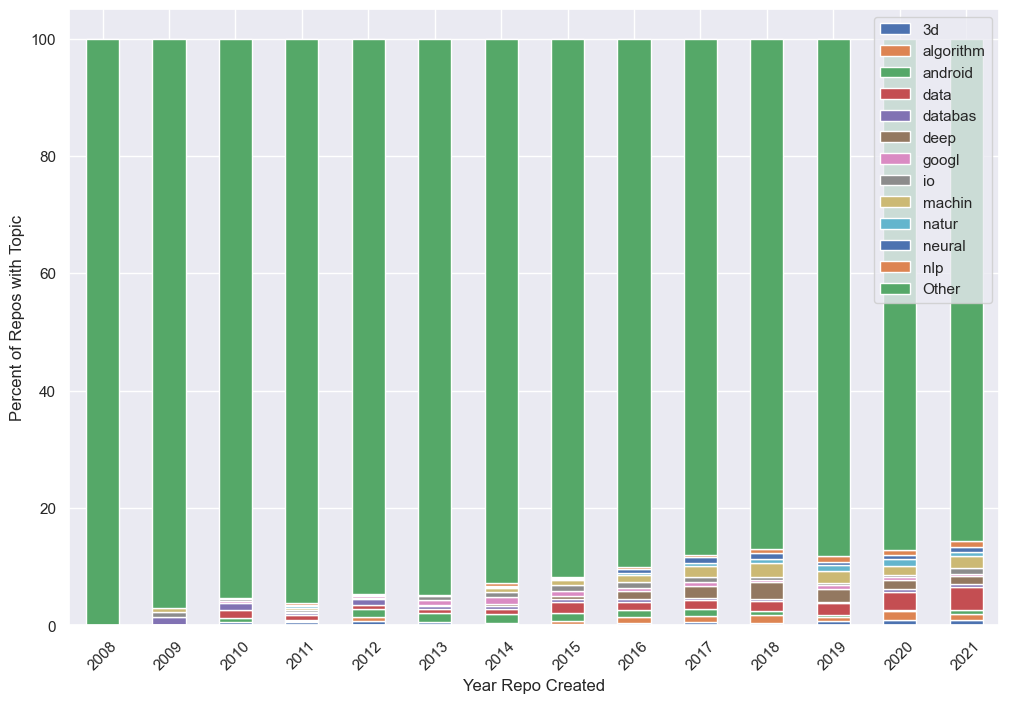

In [242]:
topic_by_year_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos with Topic')
plt.xlabel('Year Repo Created')
plt.legend()
plt.show()

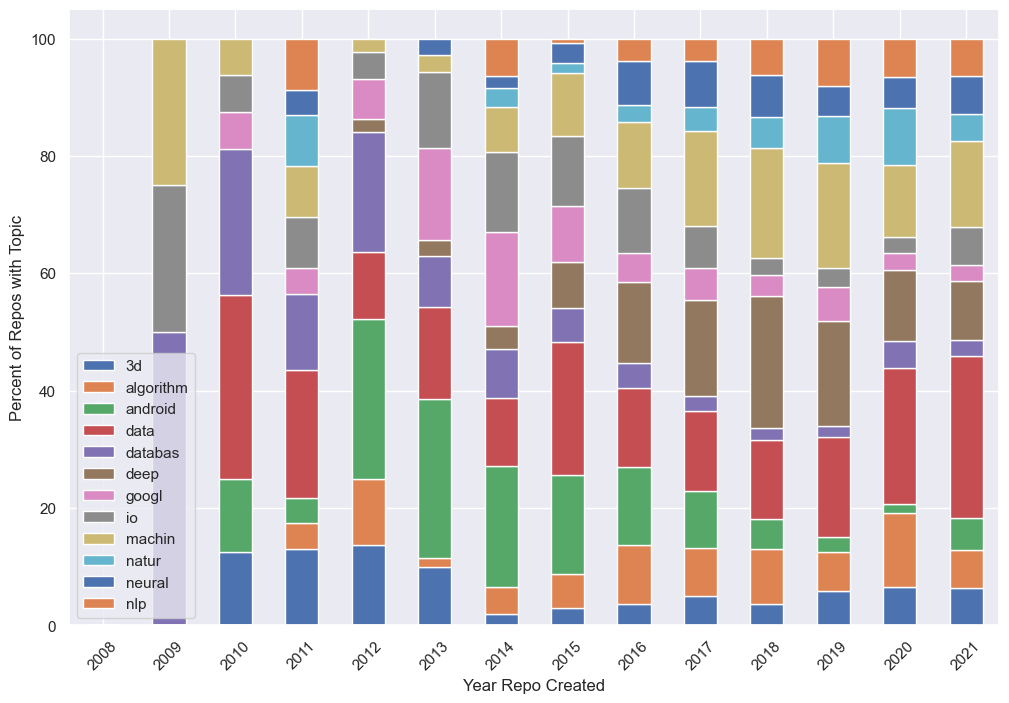

In [243]:
# discarding other because was a huge portion of topics
topic_by_year_dropped = topic_by_year.drop(columns=other_topics+['Other'])
topic_by_year_percent = topic_by_year_dropped.apply(lambda x: x*100/sum(x), axis=1)
topic_by_year_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos with Topic')
plt.xlabel('Year Repo Created')
plt.legend()
plt.show()

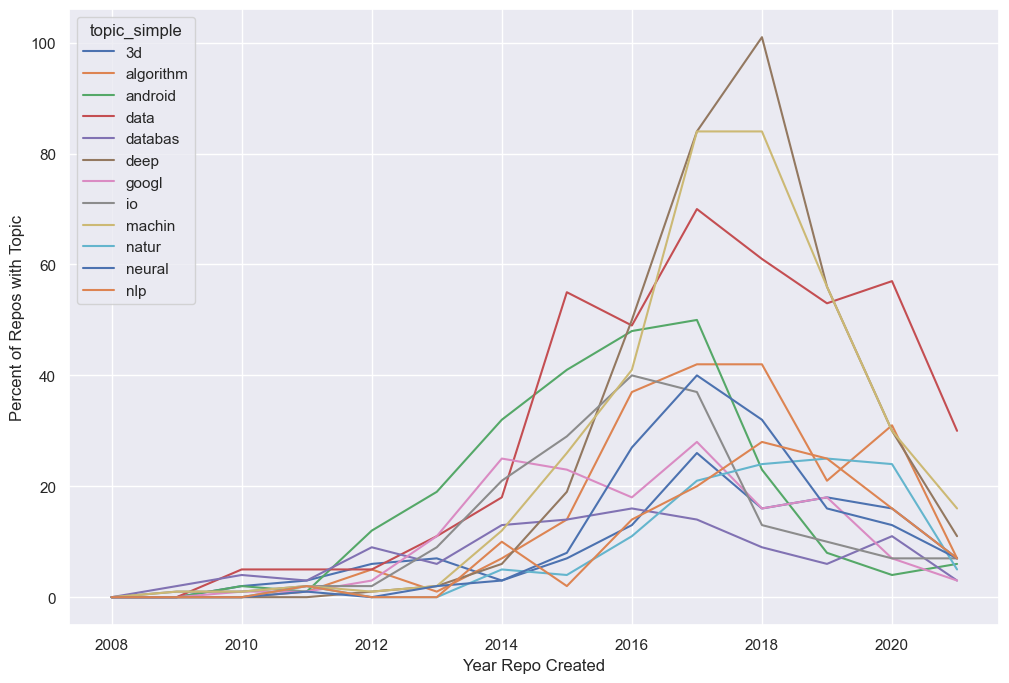

In [251]:
topic_by_year_dropped.plot.line()
plt.gcf().set_size_inches(12,8)
plt.ylabel('Percent of Repos with Topic')
plt.xlabel('Year Repo Created')
plt.show()

In [301]:
common_languages = list(language_frequency.head(10).index)

topic_by_language = pd.DataFrame(topic_rel[topic_rel['language'].isin(common_languages)].groupby(['language', 'topic_simple']).size(),columns=['size'])
topic_by_language = topic_by_language['size'].unstack()
topic_by_language = topic_by_language.fillna(0)
top_topics = topic_by_language.sum().sort_values(ascending=False).head(10)
other_topics = [l for l in list(topic_by_language.columns) if l not in top_topics]
topic_by_language_dropped = topic_by_language.drop(columns=other_topics)
topic_by_language_percent = topic_by_language_dropped.apply(lambda x: x*100/sum(x), axis=1)

### Plot 6

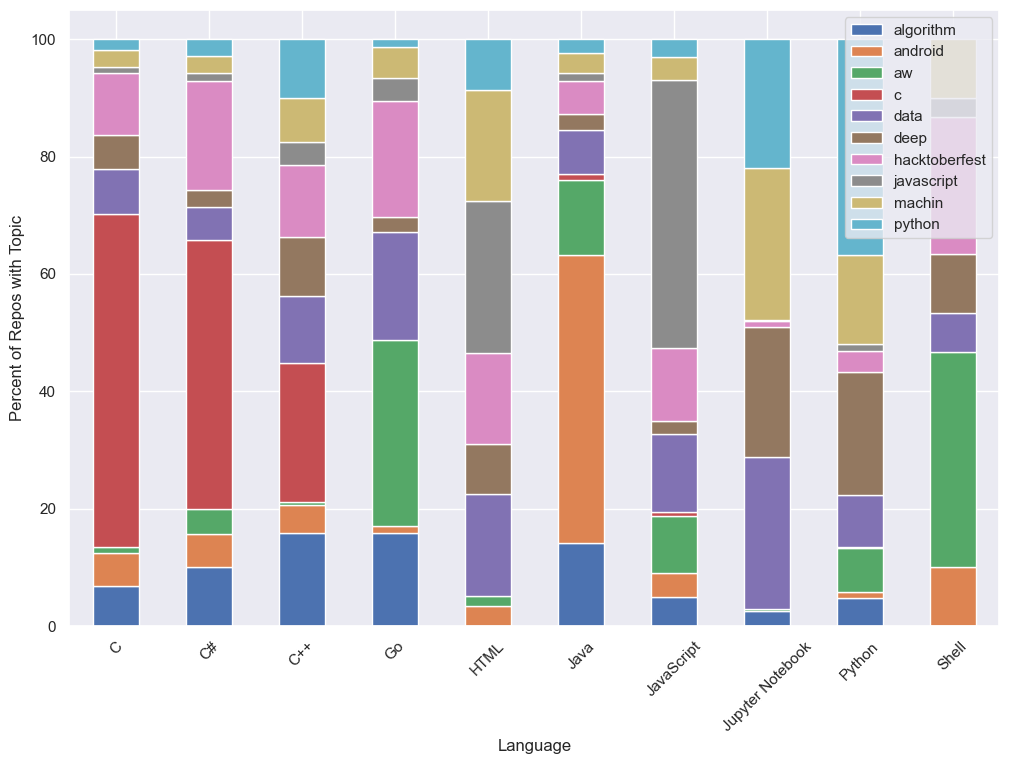

In [302]:
topic_by_language_percent.plot.bar(stacked=True)
plt.gcf().set_size_inches(12,8)
xt = plt.xticks(rotation=45)
plt.ylabel('Percent of Repos with Topic')
plt.xlabel('Language')
plt.legend()
plt.show()

### Plot 7

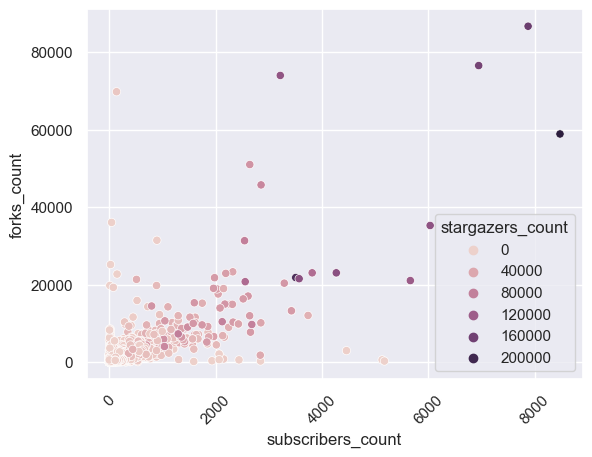

In [328]:
sns.scatterplot(x='subscribers_count',y='forks_count',hue='stargazers_count',data=github_repo)
xt = plt.xticks(rotation=45)
plt.show()

## Results/Discussion

I have scraped github and generated two datasets that will also be used for my groups final project: ```github_repo``` which contains 7945 repositories scraping by returning the top repositories for 38 different common search words. The second dataset, ```topic_rel``` is a many-to-many relationship table that maps repo ids (from ```github_repo``` to topics in the topic list in ```github_repo```. 

The first thing I had to do was simplify the topics as there were over 9000 unique topics for a topic relationship table of size 26065. I first stemmed the words using the ```nltk``` Stemmer used in lab 4 and then after inspection only used the first word in the topic. Now we have a little over 5000 topics. 

For furthur analyses using topic information I only included topics with over 150 repositories representing them. 

### Plot 1

This is a simple frequency plot to see what the most popular programming languages in general are before grouping by different categories (topic and year). The most used languages are, in order, Python, JavaScript and C++. 

### Plot 2
This is another frequency plot showing the most popular simplified topics. They are, in order, python, data, deep, machin, hacktoberfest, aw(s), javascript, android and algorithm. 

### Plot 3
The third plot shows distribution of programming languages used by topic. The topic relationship table was first grouped by both topic and language. And then all languages without more than 100 appearances were grouped into 'Other'. Finally counts were normalized to percentages so that we could focus on looking at distribution of languages across topics without being distracted varying heights due to different counts per topic. 

Some information gained is trivial, i.e the most popular language for the topic 'javascript' is JavaScript and similarly for 'python' and 'c'. However we can see that for android, Java is the most popular language and ios, Swift is the most popular language. We can also look at artificial intelligence in general. For topics of deep-learning machine-learning and neural networks Jupyter Notebook and Python are the most popular languages which is probably due to the vast number of ML packages in python like pytorch, tensorflow and sklearn. 

### Plot 4

The fourth plot followed a similar pre-processing method explained above to look at the distribution of programming languages over the years. We can see that jupyter notebook was first used in 2013 and since grown in popularity. Other programming languages that have grown in popularity (usage) over time, though less noticeably include HTML, Python and TypeScript. If we looked when these languages were first released, Jupyter Notebook was released in 2011, HTML5 was released in 2008, HTML6 was released on 2014, Python3 was released in 2008 and TypeScript was released on 2012, all of which are a few years before they can be seen showing up in plot 2. Remember that these repositories are the most popular and best matching repository for 38 different search words, so although they may have been used in repos immediately we don't see their utility (being the main language of popular repositories) until a few years after release.   

### Plot 5
The fifth plot once again followed a similar pre-processing method and this time we're looking at the distribution of topics over the years. Because there are many topics, even the topic 10 don't make up even 25% of the yearly distribution so for this analysis I removed the 'Other' category. It's hard to gather any trend from the stacked percentage bar plot so I plotted the data on a line plot with each line representing the number of repositories that represent a specific topic for each year. We see that deep, data and machine have the highest peaks so in general the are the most popular across all years but there is no clear change in trending topics from year to year. 

### Plot 6
The sixth plot again uses the same pre-processing method to look at distribution of topics for the top programming languages. 

### Plot 7
The last plot is a scatterplot comparing subscriber count to stargazer count (number of users who have starred a repository) to forks count with stargazers count being shown through color. There seems to be a positive correlation between all three metrics which make sense as if a repository is more popular you'd expect for people to have starred it, forked it and subscriber to it (potentially the same developper taking all three actions. 